In [9]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Import scripts
from proj1_helpers import *
from classifiers import *
from solver import *
from implementations import *
from dataprocessing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Preferences for plots
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.2,4.45)
matplotlib.rcParams['axes.labelsize'] = 17
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['figure.autolayout'] =  True
matplotlib.rcParams['mathtext.fontset'] = 'stix'

# If you wanna reset parameters
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [16]:
# Load data
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids, features = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
X = tX

#Percentage of outliers per features
perc = (X[:, :] <= -999.0).sum(axis=0) / X.shape[0] * 100
feats = np.array(features)
feats = feats[np.array(perc<30)]

In [19]:
# Important comment : A PCA was implemented within the file classifier.py
# A direct resolution with the class PCA_N could not be performed due to memory error
# The two other classes that could be used, AlternativePCA and RobustPCA, did not allow a biplot implementation
# The biplot produced below was only used for visualisation purposes but never for data processing. 

from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.colors import Normalize

def pca_axes(X_train,feats,scale,scale2, verbose=False):
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X_train)
    print('Explained variance', pca.explained_variance_ratio_)

    pcs = pca.components_

    colors = np.arctan2(pcs[0,:], pcs[1,:])
    colormap = cm.inferno
    norm = Normalize()
    norm.autoscale(colors)
    plt.rcParams['image.cmap'] = 'Paired'

    # Quiver
    f = plt.figure(figsize=(10,10))
    plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], color=colormap(norm(colors)),
           angles='xy', scale_units='xy', scale=scale)
    
    for i in range(0,pcs.shape[1]):
        if i==3:
            plt.text(pcs[0,i]* scale2, pcs[1,i]*scale2-0.02, feats[i], color = 'k', 
             ha = 'center', va = 'center', fontsize=13, weight='bold')
        elif i==12:
            plt.text(pcs[0,i]* scale2, pcs[1,i]*scale2-0.03, feats[i], color = 'k', 
             ha = 'center', va = 'center', fontsize=13, weight='bold')
        elif i==1:
            plt.text(pcs[0,i]* scale2-0.03, pcs[1,i]*scale2, feats[i], color = 'k', 
             ha = 'center', va = 'center', fontsize=13, weight='bold')
        elif np.power(pcs[0,i]-pcs[1,i], 2)<0.001:
            plt.text(0, 0, ' ', color = 'k', 
             ha = 'center', va = 'center', fontsize=13, weight='bold')
        else:
            plt.text(pcs[0,i]* scale2, pcs[1,i] *scale2, feats[i], color = 'k', 
             ha = 'center', va = 'center', fontsize=13, weight='bold')

    plt.xlim([-0.5,0.7])
    plt.ylim([-0.3,0.6])
    plt.xlabel('Principal component 0')
    plt.ylabel('Principal component 1')
    f.tight_layout(rect=[0, 0.03, 1, 0.95])
    f.savefig("image1.pdf", bbox_inches='tight')
        
    return

Explained variance [0.28694931 0.1129039 ]


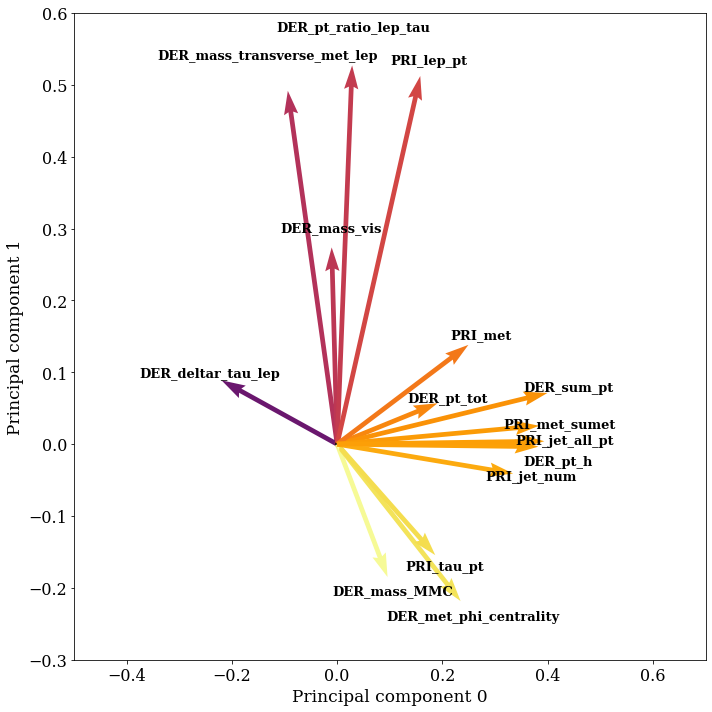

In [20]:
# Delete nans

X_train_nan = remove_NaN_features(X, 0.30)

# Need to rescale to do PCA
X_train_nan, _, _ = standardize(X_train_nan)

pca_axes(X_train_nan,feats,1,1.1, verbose=False)